# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import igraph as ig 
from matplotlib_venn import venn3, venn2
import random
import plotly.io as pio

In [2]:
seed = 16
random.seed(seed)
np.random.seed(seed)

#esto es para forzar a plt a poner fondos blancos en las figuras aunque el tema del notebook sea oscuro
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
cmap = plt.get_cmap("tab10")
pio.templates.default = "seaborn"

sns.set_style("darkgrid", rc={'xtick.bottom': True})

In [3]:
data_processed = "../../../data/processed/"
data_interim = "../../../data/interim/"
data_external = "../../../data/external/"
reports_comunidades = "../../../reports/analisis_comunidades/"

graph_node_data = pd.read_csv(data_processed+"graph_data/grafo_alternativo_CG_nodos.csv")
graph_edge_data = pd.read_csv(data_processed+"graph_data/grafo_alternativo_CG_edges.csv")

disease_attributes = pd.read_csv(data_interim+"grafo_alternativo_disease_attributes.csv")

node_counts = dict(graph_node_data.node_type.value_counts())
node_counts["total"] = sum(node_counts.values())

edge_counts = dict(graph_edge_data.edge_type.value_counts()/2)
edge_counts["total"] = sum(edge_counts.values())

display(pd.DataFrame.from_dict({"Número de nodos":node_counts}, orient="columns"))
display(pd.DataFrame.from_dict({"Número de enlaces":edge_counts}, orient="columns"))

,Número de nodos
bert_group,1043
complex,421
disease,15066
gene_protein,17322
pathway,2017
total,35869


,Número de enlaces
disease_disease,17432.0
form_complex,1885.0
gda,84024.0
pathway_protein,42643.0
ppi,110051.0
total,256035.0


In [4]:
enfermedades = graph_node_data[(graph_node_data.node_type == "disease")|(graph_node_data.node_type == "bert_group")]

Text(0.5, 0, 'Tamaño')

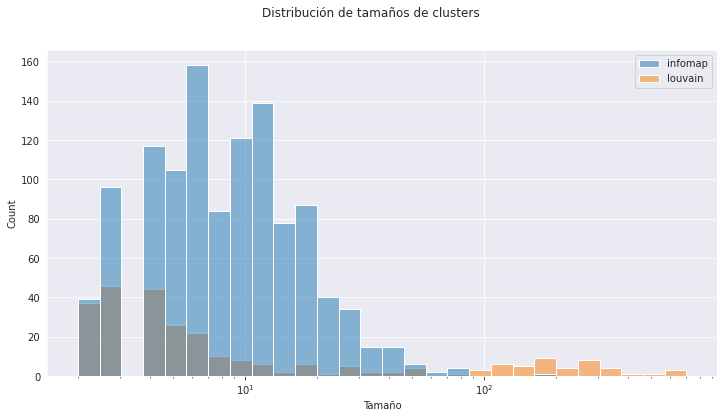

In [45]:
# fig, ax = plt.subplots(1,2,figsize=(16,6))
# fig.suptitle("Distribución de tamaños de clusters")
# ticks = np.logspace(0,tamaños_infomap.max(),10)

# sns.histplot(data=tamaños_infomap, log_scale=True, ax=ax[0])
# ax[0].set_xlabel("Tamaño")
# ax[0].set_title("Infomap")

# sns.histplot(data=tamaños_louvain,log_scale=(False,True), ax=ax[1],bins=np.linspace(2,tamaños_louvain.max(),40))
# ax[1].set_xlabel("Tamaño")
# ax[1].set_title("Louvain")

# fig2, ax2 = plt.subplots(figsize=(12,6))
# sns.histplot(data=pd.DataFrame({"infomap":tamaños_infomap,"louvain":tamaños_louvain}), log_scale=True,ax=ax2, palette="tab10")
# fig2.suptitle("Distribución de tamaños de clusters")
# ax2.set_xlabel("Tamaño")

# fig2.savefig("../../reports/analisis_comunidades/distribucion_tamaños.png", dpi=200)

Métricas de similaridad de conjuntos

In [5]:
# Unión: |, Intersección: &
def jaccard(set1,set2):
    intersection = len(set1&set2)
    union = len(set1|set2)
    return intersection/union

def int_min(set1,set2):
    intersection = len(set1&set2)
    min_set = np.min([len(set1),len(set2)])
    return intersection/min_set

def int_max(set1,set2):
    intersection = len(set1&set2)
    max_set = np.max([len(set1),len(set2)])
    return intersection/max_set

In [6]:
comunidades_infomap = enfermedades.comunidades_infomap.dropna().astype("int").sort_values().unique()
comunidades_louvain = enfermedades.comunidades_louvain.dropna().astype("int").sort_values().unique()

In [48]:
enfermedades

,node_index,node_id,node_name,node_type,node_source,comunidades_infomap,comunidades_louvain,degree_gda,degree_pp,degree_dd
7,7,10001_19287_23046_23048,ectodermal dysplasia syndrome,bert_group,primekg,220.0,42.0,0.0,0.0,64.0
17,17,100058_9385,hypervalinemia and hyperleucine-isoleucinemia,bert_group,primekg,463.0,36.0,0.0,0.0,2.0
19,19,10006_17723_17722_17721,Sandhoff disease,bert_group,primekg,467.0,36.0,0.0,0.0,8.0
28,28,100103_100102_100104_100101_8824,fetal akinesia deformation sequence,bert_group,primekg,367.0,17.0,0.0,0.0,2.0
88,88,100151_9066_18467,nephropathic cystinosis,bert_group,primekg,594.0,54.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
33426,34190,C4755299,MT-ATP6-related mitochondrial spastic paraplegia,disease,disgenet,348.0,30.0,1.0,0.0,1.0
33427,34191,C4755301,Idiopathic eosinophilic myositis,disease,disgenet,568.0,9.0,0.0,0.0,1.0
33428,34192,C4755302,Focal palmoplantar keratoderma with joint kera...,disease,disgenet,236.0,42.0,1.0,0.0,1.0
33429,34194,C4755309,Diffuse palmoplantar keratoderma with painful ...,disease,disgenet,224.0,42.0,1.0,0.0,1.0


In [7]:
conjuntos_infomap = {int(comunidad):set(enfermedades.loc[enfermedades.comunidades_infomap == comunidad,"node_index"].values) for comunidad in comunidades_infomap}
conjuntos_louvain = {int(comunidad):set(enfermedades.loc[enfermedades.comunidades_louvain == comunidad,"node_index"].values) for comunidad in comunidades_louvain}

# Comparación entre particiones

In [50]:
matrix_jaccard = {}
matrix_min = {}
matrix_max = {}

for comunidad_infomap,set_infomap in conjuntos_infomap.items():
    partial_jaccard = {}
    partial_min = {}
    partial_max = {}
    for comunidad_louvain, set_louvain in conjuntos_louvain.items():
        coef_jaccard = jaccard(set_infomap,set_louvain)
        coef_min = int_min(set_infomap,set_louvain)
        coef_max = int_max(set_infomap,set_louvain)
        partial_jaccard[comunidad_louvain] = coef_jaccard
        partial_min[comunidad_louvain] = coef_min
        partial_max[comunidad_louvain] = coef_max
    matrix_jaccard[comunidad_infomap] = partial_jaccard
    matrix_min[comunidad_infomap] = partial_min
    matrix_max[comunidad_infomap] = partial_max

In [51]:
df_jaccard = pd.DataFrame(matrix_jaccard)
df_min = pd.DataFrame(matrix_min)
df_max = pd.DataFrame(matrix_max)

In [52]:
nodos_bert = graph_node_data.loc[graph_node_data.node_type == "bert_group",["node_index","node_id","node_name","node_source"]].copy()
disease_attributes = pd.concat([disease_attributes,nodos_bert])

enfermedades_en_dd = graph_node_data.loc[graph_node_data.degree_dd != 0, "node_index"].values
disease_attributes = disease_attributes.set_index("node_index").loc[enfermedades_en_dd].reset_index()

disease_attributes = pd.merge(graph_node_data[["node_index","comunidades_infomap","comunidades_louvain"]],disease_attributes,left_on="node_index",right_on="node_index",how="right")

tamaños_louvain = disease_attributes.comunidades_louvain.value_counts()
tamaños_infomap = disease_attributes.comunidades_infomap.value_counts()

infomap_clusters = pd.DataFrame(tamaños_infomap).reset_index().rename(columns={"index":"comunidad","comunidades_infomap":"tamaño"}).astype({"comunidad":"int"})
louvain_clusters = pd.DataFrame(tamaños_louvain).reset_index().rename(columns={"index":"comunidad","comunidades_louvain":"tamaño"}).astype({"comunidad":"int"})

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

/tmp/ipykernel_32209/4195500612.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_32209/4195500612.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_32209/4195500612.py:26: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_32209/4195500612.py:40: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_32209/4195500612.py:53: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



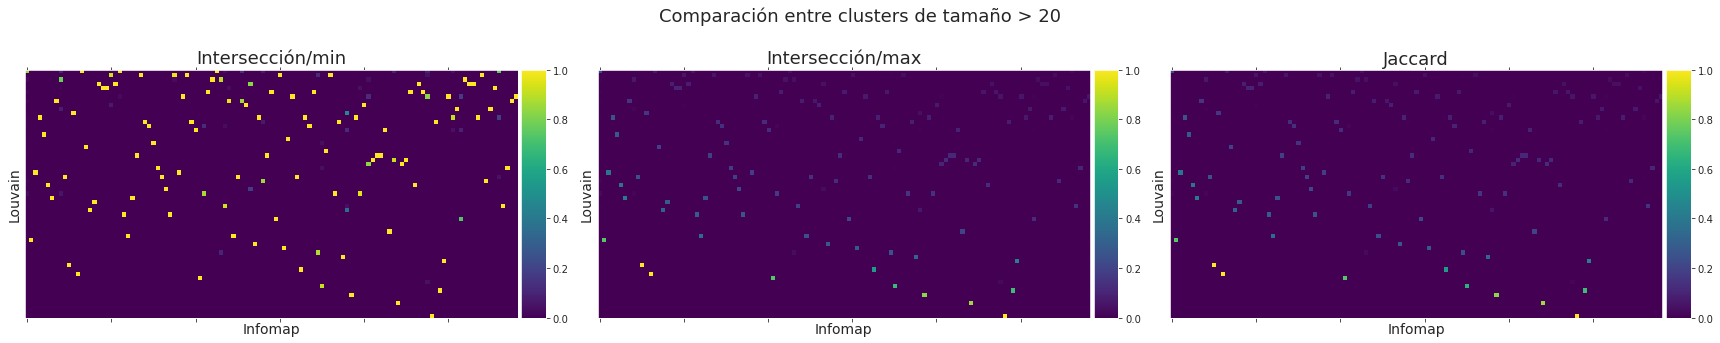

In [54]:
n = 20

infomap_corte = infomap_clusters.sort_values(by="tamaño", ascending=False)[infomap_clusters.tamaño > n].comunidad.values
louvain_corte = louvain_clusters.sort_values(by="tamaño", ascending=False)[louvain_clusters.tamaño > n].comunidad.values

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,5), sharey=True)
fig.suptitle(f"Comparación entre clusters de tamaño > {n}", fontsize=18)

jaccard_mat = df_jaccard.loc[louvain_corte,infomap_corte]
min_mat = df_min.loc[louvain_corte,infomap_corte]
max_mat = df_max.loc[louvain_corte, infomap_corte]

cmap = "viridis"

im = ax1.matshow(min_mat,
                cmap=cmap)
ax1.set_title("Intersección/min", fontsize=18)
# cbar = fig.colorbar(im, ax=ax1)
ax1.tick_params(labelbottom=False, labelleft=False,labeltop=False)
ax1.set_xlabel("Infomap", fontsize=14)
ax1.set_ylabel("Louvain", fontsize=14)
ax1.grid(False)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, ax=ax2,fraction=0.046, pad=0.04, cax=cax)


im2 = ax2.matshow(max_mat,
                cmap=cmap)
ax2.set_title('Intersección/max', fontsize=18)
# cbar = fig.colorbar(im2, ax=ax2)
ax2.tick_params(labelbottom=False, labelleft=False,labeltop=False)
ax2.set_xlabel("Infomap", fontsize=14)
ax2.set_ylabel("Louvain", fontsize=14)
ax2.grid(False)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im2, ax=ax2,fraction=0.046, pad=0.04, cax=cax2)


im3 = ax3.matshow(jaccard_mat,
                cmap=cmap)
ax3.set_title('Jaccard', fontsize=18)
ax3.tick_params(labelbottom=False, labelleft=False,labeltop=False)
ax3.set_xlabel("Infomap", fontsize=14)
ax3.set_ylabel("Louvain", fontsize=14)
ax3.grid(False)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im3, ax=ax3,fraction=0.046, pad=0.04, cax=cax3)

plt.tight_layout()

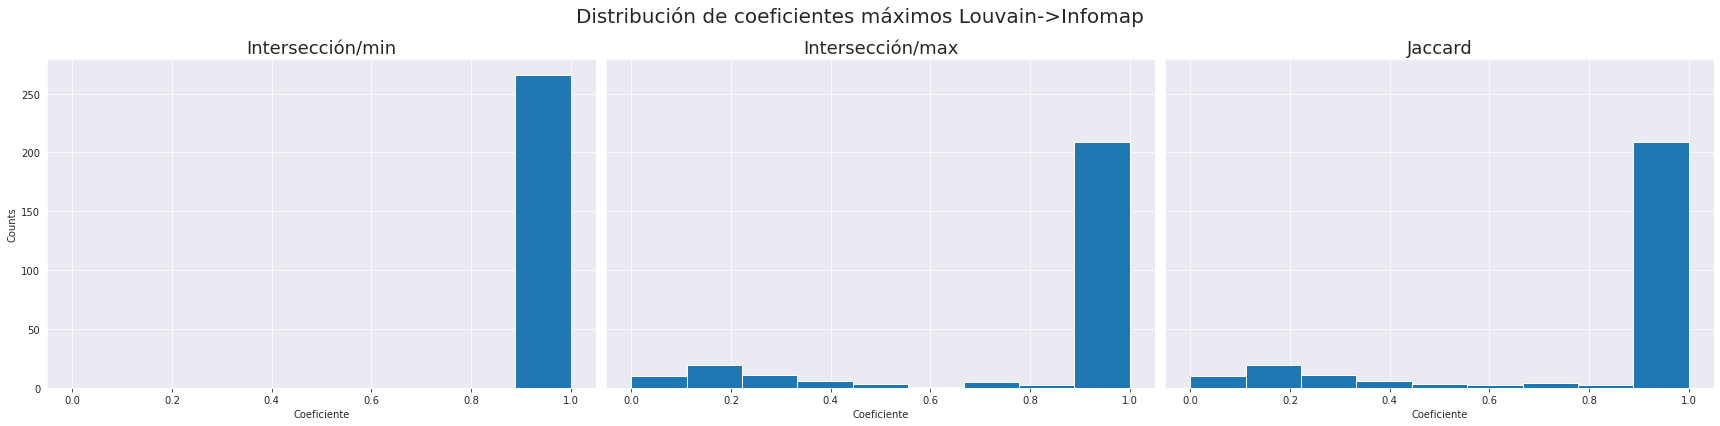

In [55]:
metricas = {"Intersección/min":df_min,"Intersección/max":df_max, "Jaccard":df_jaccard}

fig, ax = plt.subplots(1,3, figsize=(24,6), sharey=True)
fig.suptitle("Distribución de coeficientes máximos Louvain->Infomap", fontsize=20)
i=0
for name,data in metricas.items():
    ax[i].hist(data.T.max().values, bins=np.linspace(0,1,10))
    ax[i].set_title(f"{name}", fontsize=18)
    ax[i].set_xlabel("Coeficiente")
    i+=1

ax[0].set_ylabel("Counts")

plt.tight_layout()

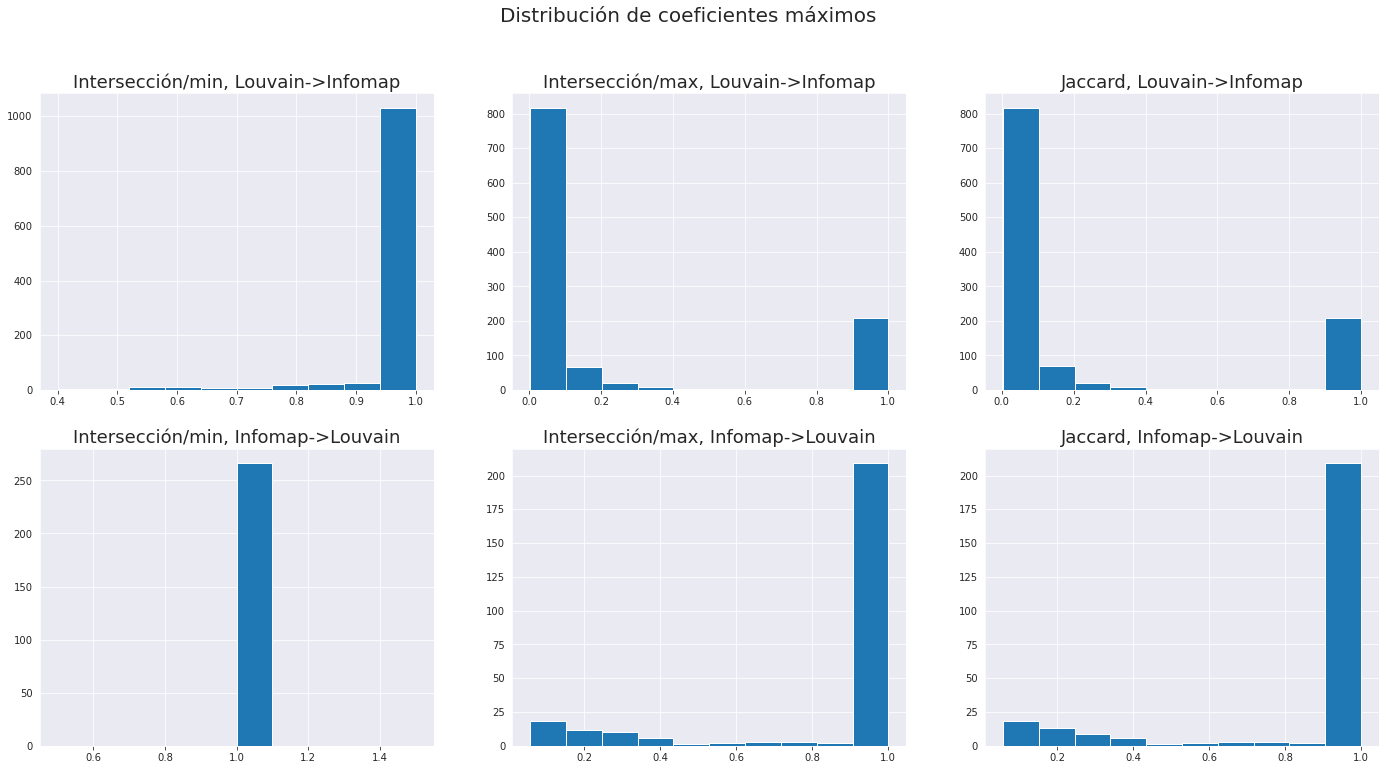

In [56]:
metricas = {"Intersección/min":df_min,"Intersección/max":df_max, "Jaccard":df_jaccard}

fig, ax = plt.subplots(2,3, figsize=(24,12))
fig.suptitle("Distribución de coeficientes máximos", fontsize=20)

i=0
for name,data in metricas.items():
    ax[0,i].hist(data.max().values)
    ax[0,i].set_title(f"{name}, Louvain->Infomap", fontsize=18)

    ax[1,i].hist(data.T.max().values)
    ax[1,i].set_title(f"{name}, Infomap->Louvain", fontsize=18)
    i+=1

# Quiero ver si las comunidades suelen tener Berts

In [57]:
bert_groups = enfermedades[enfermedades.node_type == "bert_group"]
berts_infomap = pd.DataFrame(bert_groups.comunidades_infomap.value_counts()).reset_index().rename(columns={"comunidades_infomap":"num_berts","index":"comunidad"}).astype({"comunidad":"int"})
berts_louvain = pd.DataFrame(bert_groups.comunidades_louvain.value_counts()).reset_index().rename(columns={"comunidades_louvain":"num_berts","index":"comunidad"}).astype({"comunidad":"int"})

rows_infomap = pd.DataFrame.from_dict({comunidad:0 for comunidad in comunidades_infomap if comunidad not in berts_infomap.comunidad.values},orient="index").reset_index().rename(columns={"index":"comunidad",0:"num_berts"})
rows_louvain = pd.DataFrame.from_dict({comunidad:0 for comunidad in comunidades_louvain if comunidad not in berts_louvain.comunidad.values},orient="index").reset_index().rename(columns={"index":"comunidad",0:"num_berts"})

berts_infomap = pd.concat([berts_infomap,rows_infomap])
berts_louvain = pd.concat([berts_louvain,rows_louvain])

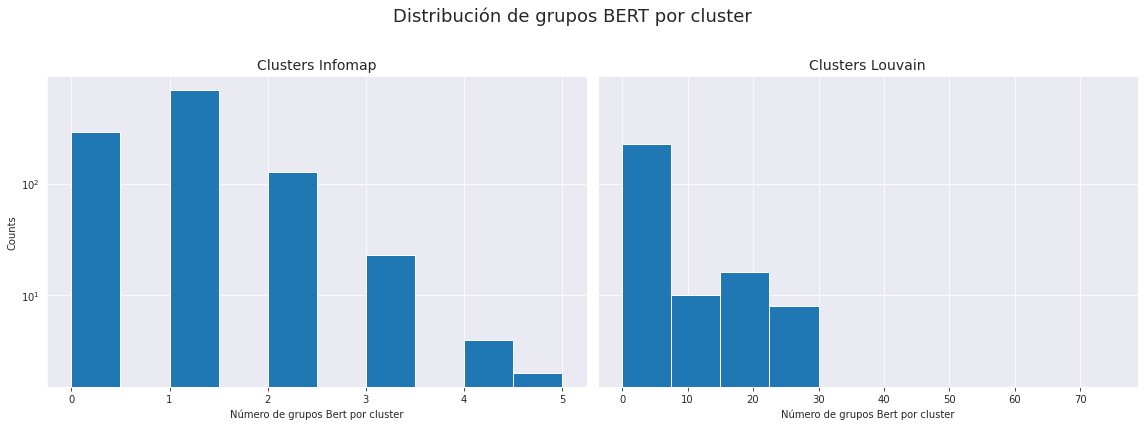

In [58]:
values_infomap = berts_infomap.num_berts.values
values_louvain = berts_louvain.num_berts.values

fig, ax = plt.subplots(1,2,figsize=(16,6), sharey=True)
fig.suptitle("Distribución de grupos BERT por cluster\n",fontsize=18)
ticks = np.logspace(0,values_louvain.max(),10)

ax[0].hist(values_infomap,log=True)
ax[0].set_title("Clusters Infomap", fontsize=14)
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Número de grupos Bert por cluster")

ax[1].hist(values_louvain,log=True)
ax[1].set_title("Clusters Louvain", fontsize=14)
ax[1].set_xlabel("Número de grupos Bert por cluster")

plt.tight_layout()

In [59]:
fig1 = px.histogram(berts_louvain["num_berts"],x="num_berts", title="Clusters Louvain",nbins=80,log_y=True)
fig1.show()

fig2 = px.histogram(berts_infomap["num_berts"],x="num_berts", title="Clusters Infomap")
fig2.show()

In [60]:
infomap_valores = berts_infomap.num_berts.value_counts()
louvain_valores = berts_louvain.num_berts.value_counts()

infomap_total = len(berts_infomap)
louvain_total = len(berts_louvain)

mas_de_uno_infomap = len(berts_infomap[berts_infomap.num_berts > 1])
mas_de_uno_louvain = len(berts_louvain[berts_louvain.num_berts > 1])

print(f"Infomap: \n{round((infomap_valores[1]*100)/infomap_total)}% de los clusters tienen un único Bert")
print(f"{round((infomap_valores[0]*100)/infomap_total)}% de los clusters no tienen ningún Bert")
print(f"{round((mas_de_uno_infomap*100)/infomap_total)}% de los clusters tiene más de un Bert\n")

print(f"Louvain: \n{round((louvain_valores[1]*100)/louvain_total)}% de los clusters tienen un único Bert")
print(f"{round((louvain_valores[0]*100)/louvain_total)}% de los clusters no tienen ningún Bert")
print(f"{round((mas_de_uno_louvain*100)/louvain_total)}% de los clusters tiene más de un Bert")

Infomap: 
61% de los clusters tienen un único Bert
26% de los clusters no tienen ningún Bert
14% de los clusters tiene más de un Bert

Louvain: 
57% de los clusters tienen un único Bert
20% de los clusters no tienen ningún Bert
23% de los clusters tiene más de un Bert


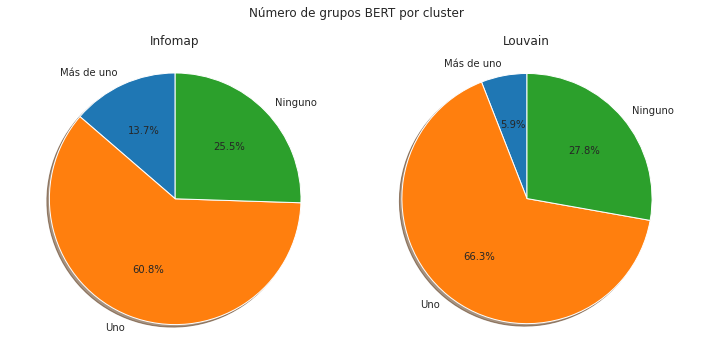

In [61]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Número de grupos BERT por cluster")

ninguno_infomap = infomap_valores[0]
unico_infomap = infomap_valores[1]

ax[0].pie([mas_de_uno_infomap,unico_infomap,ninguno_infomap], labels=["Más de uno", "Uno", "Ninguno"], autopct='%1.1f%%',shadow=True, startangle=90)
ax[0].axis('equal') 
ax[0].set_title("Infomap")


ninguno_louvain = louvain_valores[0]
unico_louvain = louvain_valores[1]

ax[1].pie([mas_de_uno_louvain,unico_infomap,ninguno_infomap], labels=["Más de uno", "Uno", "Ninguno"], autopct='%1.1f%%',shadow=True, startangle=90)
ax[1].axis('equal') 
ax[1].set_title("Louvain")

plt.tight_layout()

# fig.savefig("../../reports/analisis_comunidades/tortas_bert.png", dpi=200)

# Veo inclusión de infomap en louvain

Hago una adaptación del coeficiente sobre mínimo, en vez de mínimo pongo infomap

In [62]:
def int_min_infomap(set_infomap,set_louvain):
    intersection = len(set_infomap&set_louvain)
    min_set = len(set_infomap)
    return intersection/min_set

In [63]:
matrix_min_infomap = {}

for comunidad_infomap,set_infomap in conjuntos_infomap.items():
    partial_min_infomap = {}
    for comunidad_louvain, set_louvain in conjuntos_louvain.items():
        coef_min_infomap = int_min_infomap(set_infomap,set_louvain)
        partial_min_infomap[comunidad_louvain] = coef_min_infomap
    matrix_min_infomap[comunidad_infomap] = partial_min_infomap

df_min_infomap = pd.DataFrame(matrix_min_infomap)

/tmp/ipykernel_32209/145107736.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_32209/145107736.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



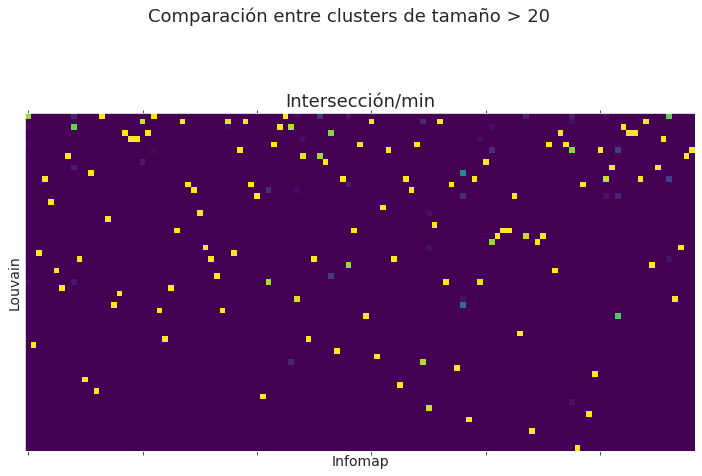

In [64]:
n = 20

infomap_corte = infomap_clusters.sort_values(by="tamaño", ascending=False)[infomap_clusters.tamaño > n].comunidad.values
louvain_corte = louvain_clusters.sort_values(by="tamaño", ascending=False)[louvain_clusters.tamaño > n].comunidad.values

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle(f"Comparación entre clusters de tamaño > {n}", fontsize=18)

min_infomap_mat = df_min_infomap.loc[louvain_corte,infomap_corte]

cmap = "viridis"

im = ax.matshow(min_infomap_mat,
                cmap=cmap)
ax.set_title("Intersección/min", fontsize=18)
# cbar = fig.colorbar(im, ax=ax1)
ax.tick_params(labelbottom=False, labelleft=False,labeltop=False)
ax.set_xlabel("Infomap", fontsize=14)
ax.set_ylabel("Louvain", fontsize=14)
ax.grid(False)

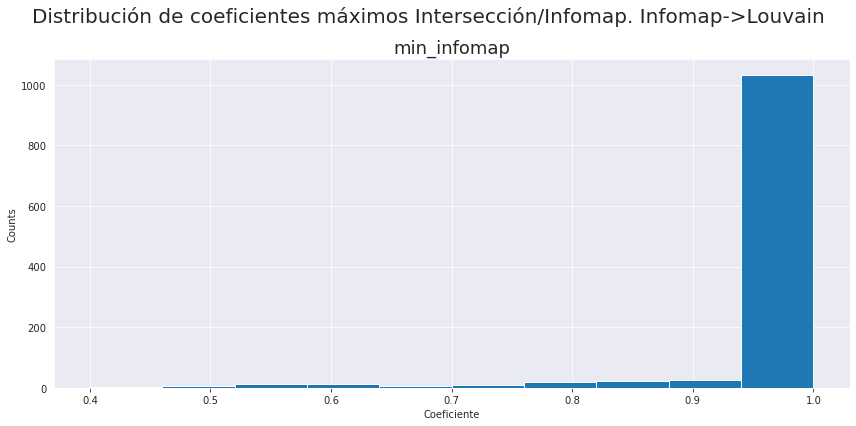

In [65]:
data = df_min_infomap
name = "min_infomap"

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Distribución de coeficientes máximos Intersección/Infomap. Infomap->Louvain", fontsize=20)
i=0

ax.hist(data.max().values)
ax.set_title(f"{name}", fontsize=18)
ax.set_xlabel("Coeficiente")
ax.set_ylabel("Counts")

plt.tight_layout()
# plt.savefig("../../../reports/analisis_comunidades/interseccion_infomap.png", dpi=200)

# Veo si las particiones capturan las estrellitas

Voy a tomar el ego network de cada nodo bert (en principio a orden 1, después veo si tiene sentido tomar a orden 2).

Una vez que tengo todas las ego networks, saco los conjuntos de nodos de cada una y hago un jaccard con infomap, como había hecho antes con infomap y louvain

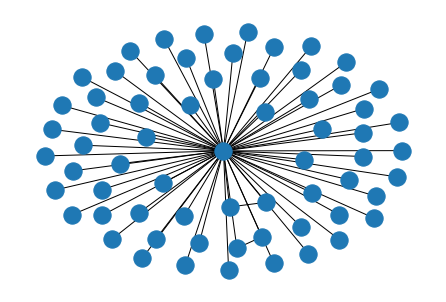

In [77]:
G = nx.read_gml(data_processed+"graph_data/grafo_alternativo_CG_disease_layer.gml")
bert_groups = graph_node_data.loc[graph_node_data.node_type == "bert_group","node_index"].values
ego_1 = {node: nx.ego_graph(G,str(node),1) for node in bert_groups}
nx.draw(ego_1[7])

In [78]:
conjuntos_berts = {center:set(ego.nodes()) for center, ego in ego_1.items()}
conjuntos_berts = {center: {int(item) for item in ego} for center,ego in conjuntos_berts.items()}

## Comparación con todas las particiones (esto no va)

### Comparo con infomap

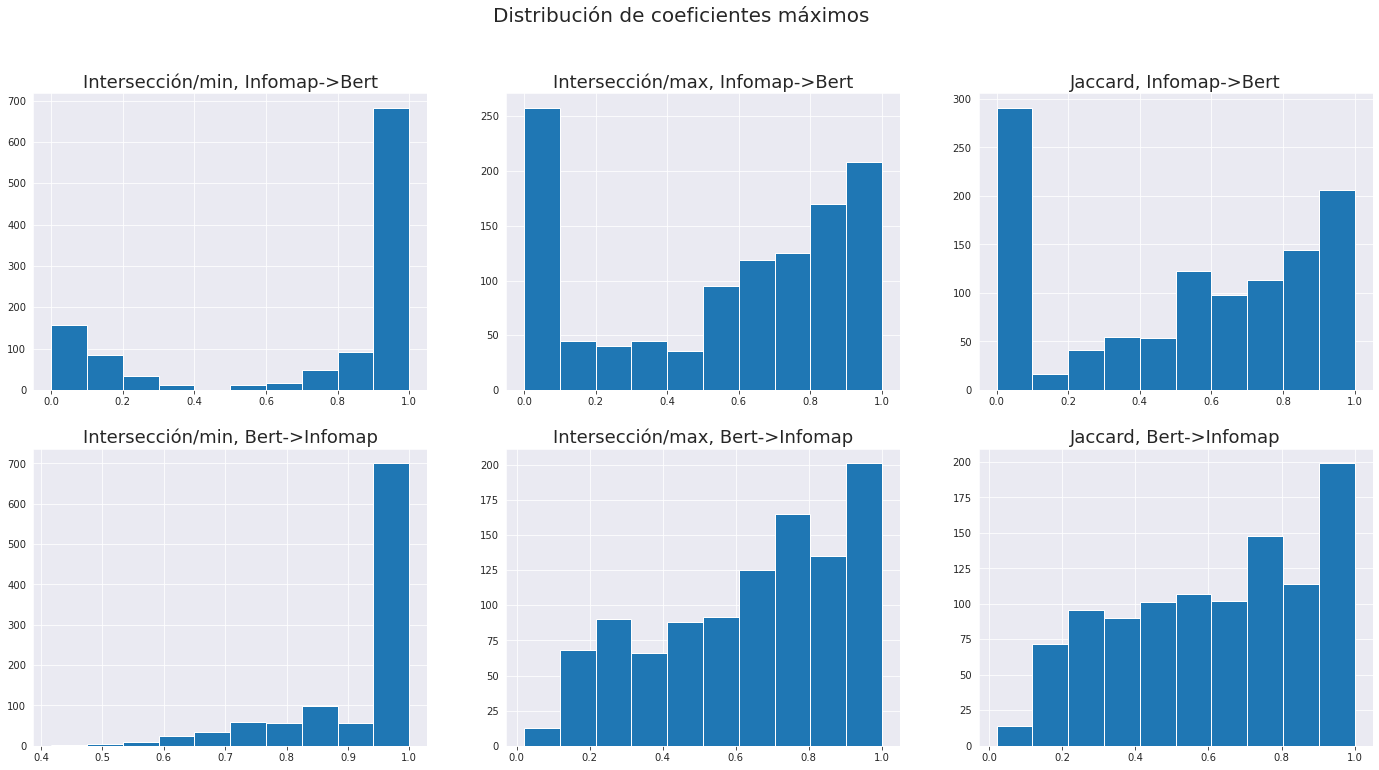

In [196]:
matrix_jaccard_bert_infomap = {}
matrix_min_bert_infomap = {}
matrix_max_bert_infomap = {}

for comunidad_infomap,set_infomap in conjuntos_infomap.items():
    partial_jaccard = {}
    partial_min = {}
    partial_max = {}
    for bert, set_bert in conjuntos_berts.items():
        coef_jaccard = jaccard(set_infomap,set_bert)
        coef_min = int_min(set_infomap,set_bert)
        coef_max = int_max(set_infomap,set_bert)
        partial_jaccard[bert] = coef_jaccard
        partial_min[bert] = coef_min
        partial_max[bert] = coef_max
    matrix_jaccard_bert_infomap[comunidad_infomap] = partial_jaccard
    matrix_min_bert_infomap[comunidad_infomap] = partial_min
    matrix_max_bert_infomap[comunidad_infomap] = partial_max

df_jaccard_bert_infomap = pd.DataFrame(matrix_jaccard_bert_infomap)
df_min_bert_infomap = pd.DataFrame(matrix_min_bert_infomap)
df_max_bert_infomap = pd.DataFrame(matrix_max_bert_infomap)

metricas = {"Intersección/min":df_min_bert_infomap,"Intersección/max":df_max_bert_infomap, "Jaccard":df_jaccard_bert_infomap}

fig, ax = plt.subplots(2,3, figsize=(24,12))
fig.suptitle("Distribución de coeficientes máximos", fontsize=20)

i=0
for name,data in metricas.items():
    ax[0,i].hist(data.max().values)
    ax[0,i].set_title(f"{name}, Infomap->Bert", fontsize=18)

    ax[1,i].hist(data.T.max().values)
    ax[1,i].set_title(f"{name}, Bert->Infomap", fontsize=18)
    i+=1

fig.savefig(reports_comunidades+"inclusion_berts_infomap.png",dpi=200)


/tmp/ipykernel_32209/806342359.py:23: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



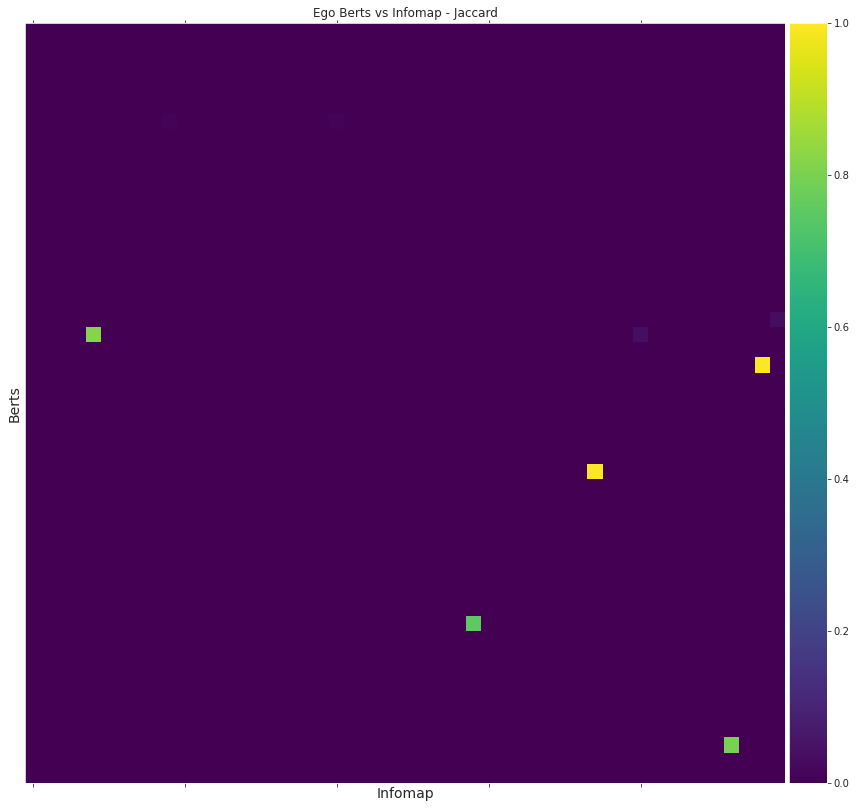

In [167]:
n = 20

# infomap_corte = infomap_clusters.sort_values(by="tamaño", ascending=False)[infomap_clusters.tamaño > 10].comunidad.values
infomap_corte = np.random.choice(infomap_clusters.comunidad.values, 50)
berts_corte = np.random.choice(bert_groups,50)

fig, ax = plt.subplots(figsize=(12,24))
# fig.suptitle("Ego Berts vs Infomap - Jaccard")
ax.set_title("Ego Berts vs Infomap - Jaccard")
jaccard_mat = df_jaccard_bert_infomap.loc[berts_corte,infomap_corte]
# jaccard_mat = df_jaccard_bert_infomap
cmap = "viridis"

im = ax.matshow(jaccard_mat,cmap=cmap, vmin=0, vmax=1)
ax1.set_title("Jaccard", fontsize=18)
# cbar = fig.colorbar(im, ax=ax1)
ax.tick_params(labelbottom=False, labelleft=False,labeltop=False)
ax.set_xlabel("Infomap", fontsize=14)
ax.set_ylabel("Berts", fontsize=14)
ax.grid(False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, ax=ax,fraction=0.046, pad=0.04, cax=cax)


plt.tight_layout()

### Comparo con Louvain

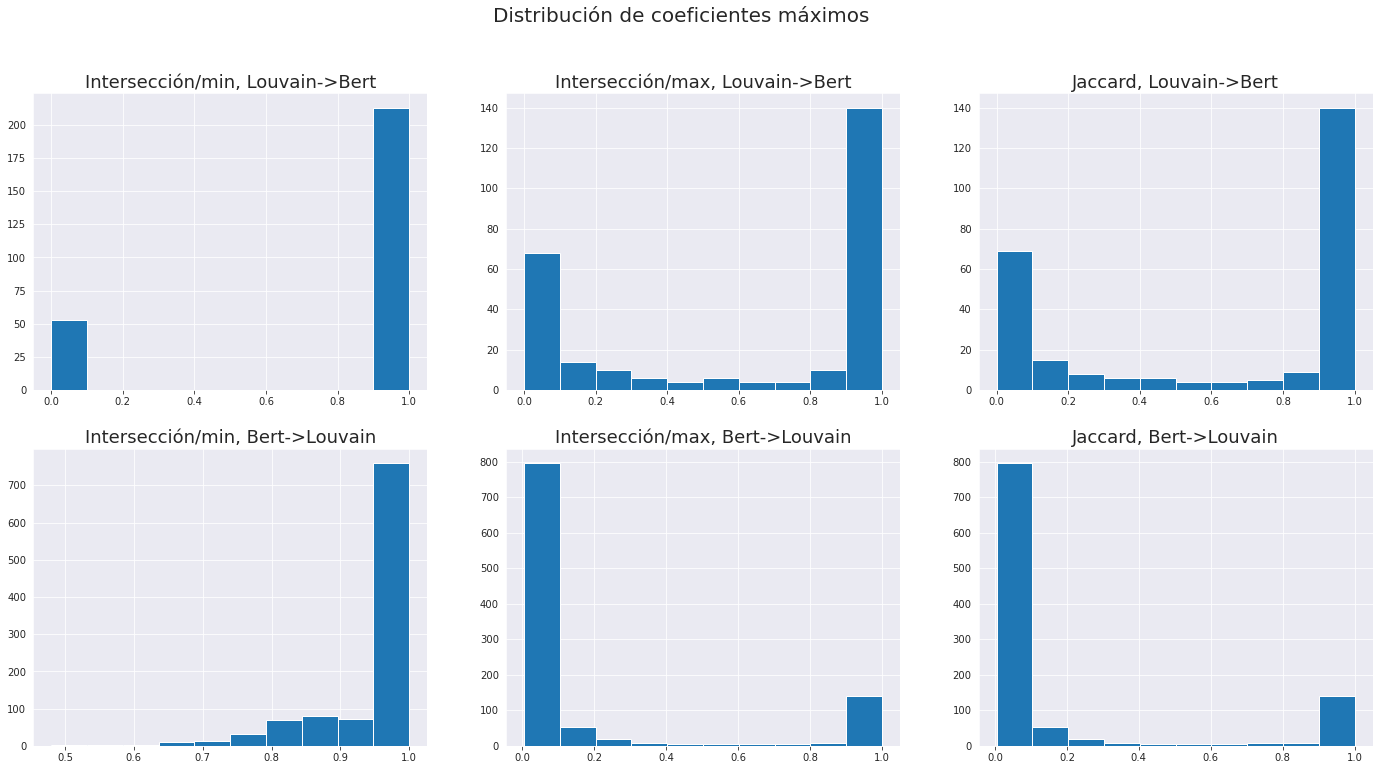

In [197]:
matrix_jaccard_bert_louvain= {}
matrix_min_bert_louvain = {}
matrix_max_bert_louvain = {}

for comunidad_louvain,set_louvain in conjuntos_louvain.items():
    partial_jaccard = {}
    partial_min = {}
    partial_max = {}
    for bert, set_bert in conjuntos_berts.items():
        coef_jaccard = jaccard(set_louvain,set_bert)
        coef_min = int_min(set_louvain,set_bert)
        coef_max = int_max(set_louvain,set_bert)
        partial_jaccard[bert] = coef_jaccard
        partial_min[bert] = coef_min
        partial_max[bert] = coef_max
    matrix_jaccard_bert_louvain[comunidad_louvain] = partial_jaccard
    matrix_min_bert_louvain[comunidad_louvain] = partial_min
    matrix_max_bert_louvain[comunidad_louvain] = partial_max

df_jaccard_bert_louvain = pd.DataFrame(matrix_jaccard_bert_louvain)
df_min_bert_louvain = pd.DataFrame(matrix_min_bert_louvain)
df_max_bert_louvain = pd.DataFrame(matrix_max_bert_louvain)

metricas = {"Intersección/min":df_min_bert_louvain,"Intersección/max":df_max_bert_louvain, "Jaccard":df_jaccard_bert_louvain}

fig, ax = plt.subplots(2,3, figsize=(24,12))
fig.suptitle("Distribución de coeficientes máximos", fontsize=20)

i=0
for name,data in metricas.items():
    ax[0,i].hist(data.max().values)
    ax[0,i].set_title(f"{name}, Louvain->Bert", fontsize=18)

    ax[1,i].hist(data.T.max().values)
    ax[1,i].set_title(f"{name}, Bert->Louvain", fontsize=18)
    i+=1

# fig.savefig(reports_comunidades+"inclusion_berts_louvain.png",dpi=200)

## Comparación vs su propia comunidad (esto si)

In [74]:
comunidades_bert = enfermedades.loc[enfermedades.node_type == "bert_group",["node_index","comunidades_infomap","comunidades_louvain"]].astype({"comunidades_infomap":"int","comunidades_louvain":"int"}).set_index("node_index").to_dict(orient="index")

In [79]:
metricas_infomap = {}
metricas_louvain = {}

for bert,comunidades in comunidades_bert.items():
    conjunto_ego = conjuntos_berts[bert]

    infomap = comunidades["comunidades_infomap"]
    conjunto_infomap = conjuntos_infomap[infomap]

    louvain = comunidades["comunidades_louvain"]
    conjunto_louvain = conjuntos_louvain[louvain]

    interseccion_bert_infomap = round(len(conjunto_ego&conjunto_infomap)/len(conjunto_ego),2)
    interseccion_bert_louvain = round(len(conjunto_ego&conjunto_louvain)/len(conjunto_ego),2)

    jaccard_bert_infomap = round(len(conjunto_ego&conjunto_infomap)/len(conjunto_ego|conjunto_infomap),2)
    jaccard_bert_louvain = round(len(conjunto_ego&conjunto_louvain)/len(conjunto_ego|conjunto_louvain),2)

    bert_tamaño_infomap = round(len(conjunto_ego)/len(conjunto_infomap),2)
    bert_tamaño_louvain = round(len(conjunto_ego)/len(conjunto_louvain),2)

    metricas_parcial_infomap = {"interseccion_sobre_bert":interseccion_bert_infomap, "jaccard":jaccard_bert_infomap, "tamaño_bert_sobre_cluster":bert_tamaño_infomap}
    metricas_parcial_louvain = {"interseccion_sobre_bert":interseccion_bert_louvain, "jaccard":jaccard_bert_louvain, "tamaño_bert_sobre_cluster":bert_tamaño_louvain}

    metricas_infomap[bert] = metricas_parcial_infomap
    metricas_louvain[bert] = metricas_parcial_louvain


df_berts_comunidades = pd.DataFrame.from_dict(comunidades_bert).T

df_metricas_bert_infomap = pd.DataFrame.from_dict(metricas_infomap).T
df_metricas_bert_infomap = pd.concat([df_berts_comunidades["comunidades_infomap"],df_metricas_bert_infomap], axis=1).reset_index().rename(columns={"index":"node_index"})

df_metricas_bert_louvain = pd.DataFrame.from_dict(metricas_louvain).T
df_metricas_bert_louvain = pd.concat([df_berts_comunidades["comunidades_louvain"],df_metricas_bert_louvain], axis=1).reset_index().rename(columns={"index":"node_index"})


In [80]:
df_metricas_bert_louvain

,node_index,comunidades_louvain,interseccion_sobre_bert,jaccard,tamaño_bert_sobre_cluster
0,7,42,0.68,0.24,0.40
1,17,36,1.00,0.02,0.02
2,19,36,1.00,0.05,0.05
3,28,17,1.00,0.00,0.00
4,88,54,1.00,0.86,0.86
...,...,...,...,...,...
1038,18393,13,0.92,0.08,0.09
1039,18401,25,0.83,0.04,0.05
1040,18410,48,0.67,0.02,0.03
1041,18426,6,1.00,0.02,0.02


In [81]:
metricas = {"Intersección/Bert":df_min_bert_infomap,"Intersección/max":df_max_bert_infomap, "Jaccard":df_jaccard_bert_infomap}

fig, ax = plt.subplots(2,3, figsize=(24,12))
fig.suptitle("Distribución de coeficientes máximos", fontsize=20)

i=0
for name,data in metricas.items():
    ax[0,i].hist(data.max().values)
    ax[0,i].set_title(f"{name}, Infomap->Bert", fontsize=18)

    ax[1,i].hist(data.T.max().values)
    ax[1,i].set_title(f"{name}, Bert->Infomap", fontsize=18)
    i+=1

# fig.savefig(reports_comunidades+"inclusion_berts_infomap.png",dpi=200)

NameError: name 'df_min_bert_infomap' is not defined

In [65]:
df_metricas_bert_louvain

,node_index,comunidades_louvain,interseccion_sobre_bert,jaccard,tamaño_bert_sobre_cluster
0,7,42,0.38,0.35,2.10
1,17,36,1.00,0.43,0.43
2,19,36,0.89,0.89,1.12
3,28,17,1.00,0.21,0.21
4,88,54,1.00,0.86,0.86
...,...,...,...,...,...
1038,18393,13,0.73,0.73,1.37
1039,18401,25,0.83,0.31,0.40
1040,18410,48,0.67,0.25,0.43
1041,18426,6,0.80,0.50,0.71


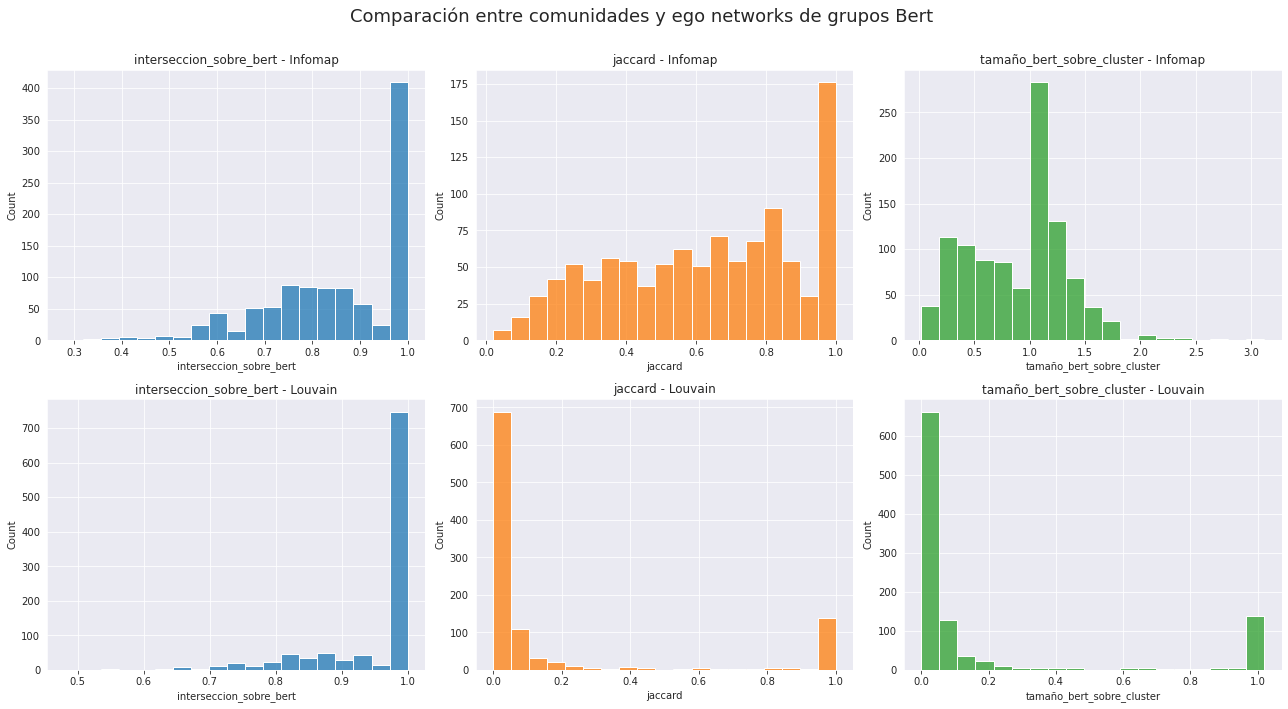

In [82]:
metricas = ["interseccion_sobre_bert", "jaccard", "tamaño_bert_sobre_cluster"]
fig, ax  = plt.subplots(2,3,figsize=(18,10))
fig.suptitle("Comparación entre comunidades y ego networks de grupos Bert \n", fontsize=18)

for i in range(3):
    current_ax = ax[0,i]
    current_ax.set_title(f"{metricas[i]} - Infomap")
    data = df_metricas_bert_infomap[metricas[i]]
    sns.histplot(data=data, ax=current_ax, color=sns.color_palette()[i], bins=np.linspace(data.min().min(), data.max().max(), 20))

for i in range(3):
    current_ax = ax[1,i]
    current_ax.set_title(f"{metricas[i]} - Louvain")
    data = df_metricas_bert_louvain[metricas[i]]
    sns.histplot(data=data, ax=current_ax, color=sns.color_palette()[i], bins=np.linspace(data.min().min(), data.max().max(), 20))

plt.tight_layout()
# plt.savefig(reports_comunidades+"ego_networks_vs_comunidades.png", dpi=200)

# Veo si "mapeos bert" tiene overlap con comunidades

In [49]:
bert_edges = pd.read_csv(data_processed+"graph_data/disease_bert_edges.csv").drop(columns=["Unnamed: 0"])

In [65]:
bert_subgraphs = {}

for group in bert_groups:
    conjunto_bert = set(bert_edges.loc[bert_edges.x_index == group, "y_index"].values)
    conjunto_bert.update([group])
    bert_subgraphs[group] = conjunto_bert

In [68]:
comunidades_bert = enfermedades.loc[enfermedades.node_type == "bert_group",["node_index","comunidades_infomap","comunidades_louvain"]].astype({"comunidades_infomap":"int","comunidades_louvain":"int"}).set_index("node_index").to_dict(orient="index")

In [83]:
metricas_infomap = {}
metricas_louvain = {}

for bert,comunidades in comunidades_bert.items():
    conjunto_mapeo = bert_subgraphs[bert]

    infomap = comunidades["comunidades_infomap"]
    conjunto_infomap = conjuntos_infomap[infomap]

    louvain = comunidades["comunidades_louvain"]
    conjunto_louvain = conjuntos_louvain[louvain]

    interseccion_bert_infomap = round(len(conjunto_mapeo&conjunto_infomap)/len(conjunto_mapeo),2)
    interseccion_bert_louvain = round(len(conjunto_mapeo&conjunto_louvain)/len(conjunto_mapeo),2)

    jaccard_bert_infomap = round(len(conjunto_mapeo&conjunto_infomap)/len(conjunto_mapeo|conjunto_infomap),2)
    jaccard_bert_louvain = round(len(conjunto_mapeo&conjunto_louvain)/len(conjunto_mapeo|conjunto_louvain),2)

    bert_tamaño_infomap = round(len(conjunto_mapeo)/len(conjunto_infomap),2)
    bert_tamaño_louvain = round(len(conjunto_mapeo)/len(conjunto_louvain),2)

    metricas_parcial_infomap = {"interseccion_sobre_bert":interseccion_bert_infomap, "jaccard":jaccard_bert_infomap, "tamaño_bert_sobre_cluster":bert_tamaño_infomap}
    metricas_parcial_louvain = {"interseccion_sobre_bert":interseccion_bert_louvain, "jaccard":jaccard_bert_louvain, "tamaño_bert_sobre_cluster":bert_tamaño_louvain}

    metricas_infomap[bert] = metricas_parcial_infomap
    metricas_louvain[bert] = metricas_parcial_louvain


df_berts_comunidades = pd.DataFrame.from_dict(comunidades_bert).T

df_metricas_bert_infomap = pd.DataFrame.from_dict(metricas_infomap).T
df_metricas_bert_infomap = pd.concat([df_berts_comunidades["comunidades_infomap"],df_metricas_bert_infomap], axis=1).reset_index().rename(columns={"index":"node_index"})

df_metricas_bert_louvain = pd.DataFrame.from_dict(metricas_louvain).T
df_metricas_bert_louvain = pd.concat([df_berts_comunidades["comunidades_louvain"],df_metricas_bert_louvain], axis=1).reset_index().rename(columns={"index":"node_index"})

In [89]:
df_metricas_bert_louvain.interseccion_sobre_bert.value_counts()

1.0    1043
Name: interseccion_sobre_bert, dtype: int64

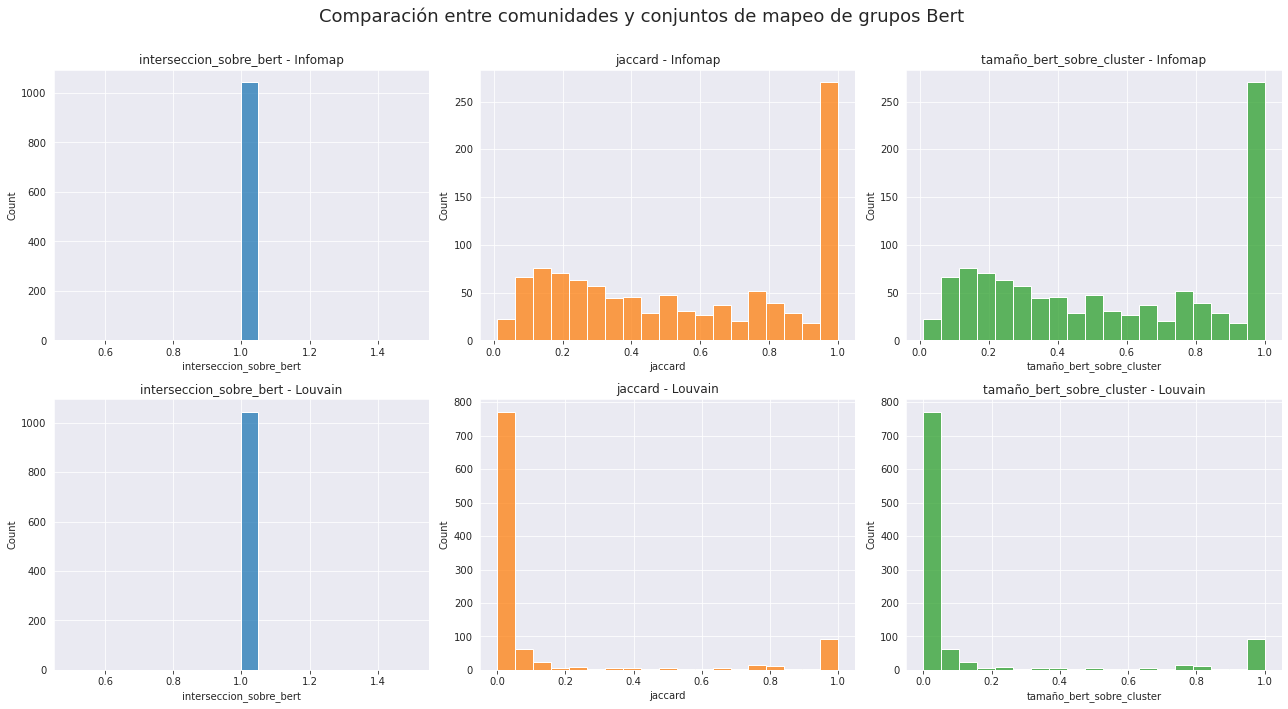

In [96]:
metricas = ["interseccion_sobre_bert", "jaccard", "tamaño_bert_sobre_cluster"]
fig, ax  = plt.subplots(2,3,figsize=(18,10))
fig.suptitle("Comparación entre comunidades y conjuntos de mapeo de grupos Bert \n", fontsize=18)

current_ax = ax[0,0]
current_ax.set_title(f"{metricas[0]} - Infomap")
data = df_metricas_bert_infomap[metricas[0]]
sns.histplot(data=data, ax=current_ax, color=sns.color_palette()[0], bins=20)


current_ax = ax[1,0]
current_ax.set_title(f"{metricas[0]} - Louvain")
data = df_metricas_bert_louvain[metricas[0]]
sns.histplot(data=data, ax=current_ax, color=sns.color_palette()[0], bins=20)

for i in range(2):
    current_ax = ax[0,i+1]
    current_ax.set_title(f"{metricas[i+1]} - Infomap")
    data = df_metricas_bert_infomap[metricas[i+1]]
    sns.histplot(data=data, ax=current_ax, color=sns.color_palette()[i+1], bins=np.linspace(data.min().min(), data.max().max(), 20))

for i in range(2):
    current_ax = ax[1,i+1]
    current_ax.set_title(f"{metricas[i+1]} - Louvain")
    data = df_metricas_bert_louvain[metricas[i+1]]
    sns.histplot(data=data, ax=current_ax, color=sns.color_palette()[i+1], bins=np.linspace(data.min().min(), data.max().max(), 20))

plt.tight_layout()
# plt.savefig(reports_comunidades+"mapeos_vs_comunidades.png", dpi=200)